In [19]:
import numpy as np
import matplotlib as mat
import os
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scvelo as scv
import multivelo as mv

In [7]:
scv.__version__

'0.3.1'

In [2]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
np.set_printoptions(suppress=True)

In [58]:
#Preprocessing the ATAC 
sampleID = ['Gan59','Gan60','Gan61','Gan62','Gan63','Gan64','Gan66','Gan142','Gan142v2','Gan144','Gan144v2','Gan147']

i = 0
for sample in sampleID: 
    i = i+1
    matrix_path = f'/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_{sample}/outs/filtered_feature_bc_matrix/'
    print(f'reading ATAC input from the mtx path : {matrix_path}')
    adata_atac = sc.read_10x_mtx(matrix_path, var_names='gene_symbols', cache=True, gex_only=False)
    adata_atac = adata_atac[:,adata_atac.var['feature_types'] == "Peaks"]
    adata_atac = mv.aggregate_peaks_10x(adata_atac,
                                    f'/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_{sample}/outs/peak_annotation.tsv',
                                    f'/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_{sample}/outs/analysis/feature_linkage/feature_linkage.bedpe',
                                    verbose=True)
    mv.tfidf_norm(adata_atac)
    # subset the annotated cells from ATAC assay 
    cell_anno_path = f'/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/{sample}_celltype_annotation.txt'
    cell_annot = pd.read_csv(cell_anno_path,sep = "\t",index_col=0)
    shared_cells_anno = pd.Index(np.intersect1d(adata_atac.obs_names, cell_annot.index))
    adata_atac = adata_atac[shared_cells_anno,:]
      adata_atac.obs_names = [f'{sample}_' + x for x in adata_atac.obs_names]
    adata_atac.var_names_make_unique()
    if i == 1: adata_atac_all = adata_atac
    
    if i > 1:
        adata_atac_all = adata_atac_all.concatenate(adata_atac)

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan59/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 17841 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/17841 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan60/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 19254 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/19254 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan61/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 17532 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/17532 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan62/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 19317 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/19317 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan63/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 18285 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/18285 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan64/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 19252 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/19252 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan66/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 16995 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/16995 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan142/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 17632 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/17632 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan142v2/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 17417 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/17417 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan144/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 15609 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/15609 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan144v2/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 18003 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/18003 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan147/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 17811 genes with promoter peaks


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/17811 [00:00<?, ?it/s]

sample

In [59]:
adata_atac_all

AnnData object with n_obs × n_vars = 48262 × 13999
    obs: 'batch'

In [60]:
adata_atac_all.obs

batch
Gan59_AAACAGCCAAATTCGT-1-0-0-0-0-0-0-0-0-0-0-0     0
Gan59_AAACAGCCAATAGCCC-1-0-0-0-0-0-0-0-0-0-0-0     0
Gan59_AAACAGCCACAATGCC-1-0-0-0-0-0-0-0-0-0-0-0     0
Gan59_AAACAGCCACAGACTC-1-0-0-0-0-0-0-0-0-0-0-0     0
Gan59_AAACATGCAAACCTAT-1-0-0-0-0-0-0-0-0-0-0-0     0
...                                              ...
Gan147_TTTGTGGCAAGCCAGA-1-1                        1
Gan147_TTTGTGGCAGGCTGTT-1-1                        1
Gan147_TTTGTGGCATCGTTCT-1-1                        1
Gan147_TTTGTTGGTAATGACT-1-1                        1
Gan147_TTTGTTGGTAGTTACG-1-1                        1

[48262 rows x 1 columns]

In [61]:
### rename the index (cellid) after concatenation
adata_atac_all.obs_names = [x.split('-')[0][:] + '-1' for x in adata_atac_all.obs_names]

In [62]:
adata_atac_all.obs

batch
Gan59_AAACAGCCAAATTCGT-1      0
Gan59_AAACAGCCAATAGCCC-1      0
Gan59_AAACAGCCACAATGCC-1      0
Gan59_AAACAGCCACAGACTC-1      0
Gan59_AAACATGCAAACCTAT-1      0
...                         ...
Gan147_TTTGTGGCAAGCCAGA-1     1
Gan147_TTTGTGGCAGGCTGTT-1     1
Gan147_TTTGTGGCATCGTTCT-1     1
Gan147_TTTGTTGGTAATGACT-1     1
Gan147_TTTGTTGGTAGTTACG-1     1

[48262 rows x 1 columns]

In [63]:
adata_atac_all.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_10controls_adata_ATAC_raw.h5ad')

In [53]:
#sampleID = ['Gan45','Gan47','Gan48','Gan49','Gan50','Gan60','Gan61','Gan62','Gan63','Gan64','Gan66']
#sampleID = ['Gan60','Gan61','Gan62','Gan63','Gan64','Gan66','Gan147']
sampleID = ['Gan59','Gan60','Gan61','Gan62','Gan63','Gan64','Gan66','Gan142','Gan142v2','Gan144','Gan144v2','Gan147']

i = 0
for sample in sampleID: 
    i = i+1
    loom_path = f'/athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/{sample}.loom'
    cell_anno_path = f'/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/{sample}_celltype_annotation.txt'
    print(f'loom file path is {loom_path}')
    print(f'cell annotation file path is {cell_anno_path}')
    adata_rna = scv.read(loom_path, cache=True)
    adata_rna.obs_names = [x.split(':')[1][:-1] + '-1' for x in adata_rna.obs_names]
    cell_annot = pd.read_csv(cell_anno_path,sep = "\t",index_col=0)
    ## subset annotated cells from RNA assay
    shared_cells_anno = pd.Index(np.intersect1d(adata_rna.obs_names, cell_annot.index))
    adata_rna = adata_rna[shared_cells_anno,:]
    ## assign celltypes
    adata_rna.obs['celltype'] = cell_annot['celltype']
    ### rename cells with sampleID
    adata_rna.obs_names = [f'{sample}_' + x for x in adata_rna.obs_names]
    adata_rna.var_names_make_unique()

    if i == 1: adata_rna_all = adata_rna
  
    if i > 1:
        adata_rna_all = adata_rna_all.concatenate(adata_rna)


loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan59.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan59_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan60.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan60_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan61.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan61_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan62.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan62_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan63.loom
cell annotation file path is /athena/tilgnerlab/scratch/we

In [54]:
adata_rna_all.obs_names

Index(['Gan59_AAACAGCCAAATTCGT-1-0-0-0-0-0-0-0-0-0-0-0',
       'Gan59_AAACAGCCAATAGCCC-1-0-0-0-0-0-0-0-0-0-0-0',
       'Gan59_AAACAGCCACAATGCC-1-0-0-0-0-0-0-0-0-0-0-0',
       'Gan59_AAACAGCCACAGACTC-1-0-0-0-0-0-0-0-0-0-0-0',
       'Gan59_AAACATGCAAACCTAT-1-0-0-0-0-0-0-0-0-0-0-0',
       'Gan59_AAACATGCAAGCTAAA-1-0-0-0-0-0-0-0-0-0-0-0',
       'Gan59_AAACATGCAATAATCC-1-0-0-0-0-0-0-0-0-0-0-0',
       'Gan59_AAACCAACAAGGACCA-1-0-0-0-0-0-0-0-0-0-0-0',
       'Gan59_AAACCAACACAAGCCT-1-0-0-0-0-0-0-0-0-0-0-0',
       'Gan59_AAACCAACAGTATGTT-1-0-0-0-0-0-0-0-0-0-0-0',
       ...
       'Gan147_TTTGTGAAGCCGCAGT-1-1', 'Gan147_TTTGTGAAGGTCAAAG-1-1',
       'Gan147_TTTGTGAAGGTTAGCT-1-1', 'Gan147_TTTGTGAAGTTTGAGC-1-1',
       'Gan147_TTTGTGGCAACCCTCC-1-1', 'Gan147_TTTGTGGCAAGCCAGA-1-1',
       'Gan147_TTTGTGGCAGGCTGTT-1-1', 'Gan147_TTTGTGGCATCGTTCT-1-1',
       'Gan147_TTTGTTGGTAATGACT-1-1', 'Gan147_TTTGTTGGTAGTTACG-1-1'],
      dtype='object', length=48262)

In [55]:
### rename the index (cellid) after concatenation
adata_rna_all.obs_names = [x.split('-')[0][:] + '-1' for x in adata_rna_all.obs_names]

In [56]:
adata_rna_all.obs

celltype batch
Gan59_AAACAGCCAAATTCGT-1      OLIG     0
Gan59_AAACAGCCAATAGCCC-1        MG     0
Gan59_AAACAGCCACAATGCC-1       InN     0
Gan59_AAACAGCCACAGACTC-1       InN     0
Gan59_AAACATGCAAACCTAT-1       ASC     0
...                            ...   ...
Gan147_TTTGTGGCAAGCCAGA-1      ExN     1
Gan147_TTTGTGGCAGGCTGTT-1      ASC     1
Gan147_TTTGTGGCATCGTTCT-1      ExN     1
Gan147_TTTGTTGGTAATGACT-1      ASC     1
Gan147_TTTGTTGGTAGTTACG-1      InN     1

[48262 rows x 2 columns]

In [57]:
adata_rna_all.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_10controls_adata_RNA_raw.h5ad')

In [64]:
scv.pp.filter_and_normalize(adata_rna_all, min_shared_counts=10)

Filtered out 21907 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Logarithmized X.


In [65]:
adata_rna_all

AnnData object with n_obs × n_vars = 48262 × 14694
    obs: 'celltype', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    uns: 'log1p'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [66]:
## import the genes tested for dPSI
PSI_genes = pd.Index(pd.read_csv("/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/delta_PSI_case_control_19samples/celltypes_tested_symbol", header=None)[0])

In [67]:
PSI_genes

Index(['AAK1', 'ABAT', 'ABCA10', 'ABCA5', 'ABCB9', 'ABCC1', 'ABHD11', 'ABHD12',
       'ABHD6', 'ABI1',
       ...
       'ZNF567', 'ZNF568', 'ZNF573', 'ZNF615', 'ZNF638', 'ZNF706', 'ZNF711',
       'ZRANB3', 'ZSWIM7', 'ZYX'],
      dtype='object', name=0, length=1874)

In [68]:
shared_cells = pd.Index(np.intersect1d(adata_rna_all.obs_names, adata_atac_all.obs_names))
shared_genes_assay = pd.Index(np.intersect1d(adata_rna_all.var_names, adata_atac_all.var_names))

In [69]:
len(shared_cells), len(shared_genes_assay)

(48262, 10642)

In [70]:
## find the shared genes between RNA-ATAC assays and dPSI tested genes
shared_genes = pd.Index(np.intersect1d(shared_genes_assay, PSI_genes))

In [71]:
shared_genes

Index(['AAK1', 'ABAT', 'ABCA5', 'ABCB9', 'ABCC1', 'ABHD12', 'ABHD6', 'ABI1',
       'ABI2', 'ABL2',
       ...
       'ZNF567', 'ZNF568', 'ZNF573', 'ZNF615', 'ZNF638', 'ZNF706', 'ZNF711',
       'ZRANB3', 'ZSWIM7', 'ZYX'],
      dtype='object', length=1621)

In [72]:
### reload rna assay
adata_rna_all = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_10controls_adata_RNA_raw.h5ad")

In [73]:
adata_rna_all

AnnData object with n_obs × n_vars = 48262 × 36601
    obs: 'celltype', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [74]:
## subset the shared_cells and shared_genes from whole assay
adata_rna = adata_rna_all[shared_cells, shared_genes]

In [75]:
adata_rna

View of AnnData object with n_obs × n_vars = 48262 × 1621
    obs: 'celltype', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [76]:
adata_rna.var_names_make_unique()

In [77]:
scv.pp.normalize_per_cell(adata_rna)
scv.pp.log1p(adata_rna)

Normalized count data: X, spliced, unspliced.


/tmp/ipykernel_7229/2089892543.py:2: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata_rna)


In [78]:
scv.pp.moments(adata_rna, n_pcs=30, n_neighbors=50)

computing neighbors
    finished (0:00:18) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:09) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [79]:
adata_rna.obs['celltype'] = adata_rna.obs['celltype'].astype('category')

In [80]:
adata_rna.obs['celltype']

Gan142_AAACAGCCAAGCGAGC-1     ExN
Gan142_AAACAGCCAATTGAAG-1     InN
Gan142_AAACAGCCATTATCCC-1    OLIG
Gan142_AAACATGCACACCAAC-1    OLIG
Gan142_AAACCAACACCTGCCT-1    OLIG
                             ... 
Gan66_TTTGTTGGTCAGGCCA-1     OLIG
Gan66_TTTGTTGGTCTTGCAT-1       MG
Gan66_TTTGTTGGTTACGCGG-1      ExN
Gan66_TTTGTTGGTTGAAGCC-1      ExN
Gan66_TTTGTTGGTTGCATCT-1      ExN
Name: celltype, Length: 48262, dtype: category
Categories (11, object): ['ASC', 'ENDC', 'ExN', 'FB', ..., 'OPC', 'TC', 'VENC', 'VLMC']

In [81]:
adata_rna = adata_rna[adata_rna.obs['celltype'].isin(['ASC',
                                                      'ExN',
                                                      'InN',
                                                      'MG',
                                                      'OLIG',
                                                      'OPC'])]

In [82]:
adata_rna

View of AnnData object with n_obs × n_vars = 47549 × 1621
    obs: 'celltype', 'batch', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [44]:
#os.mkdir("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/")

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/all_10Controls_spliced.unpliced_proportions_dPSIgenes.pdf


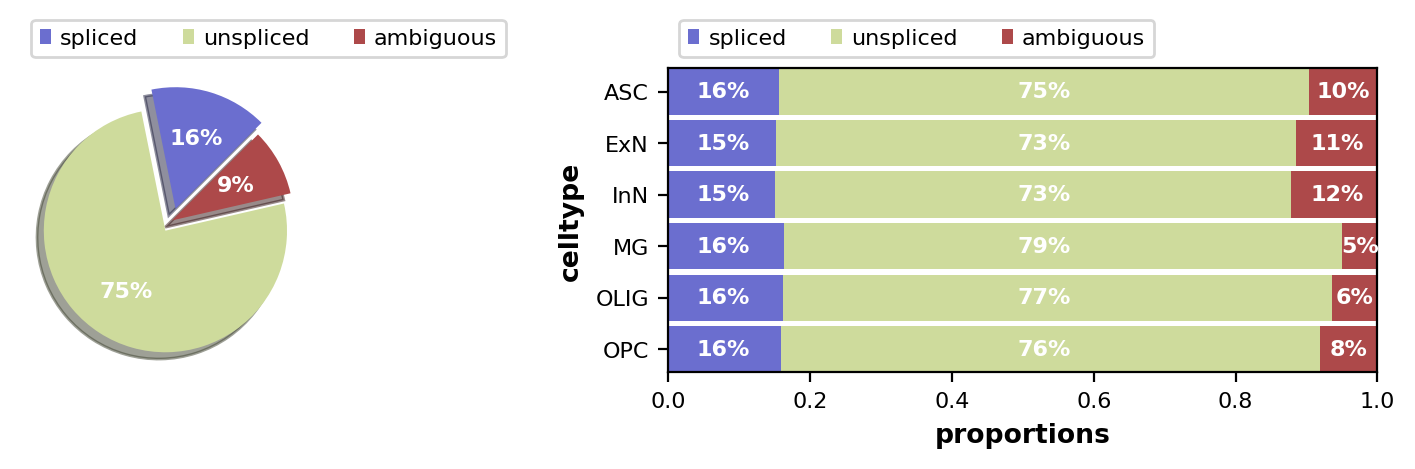

In [83]:
scv.pl.proportions(adata_rna, groupby='celltype',save='/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/all_10Controls_spliced.unpliced_proportions_dPSIgenes.pdf' )

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_adata_rna_umap_dPSI_genes.pdf


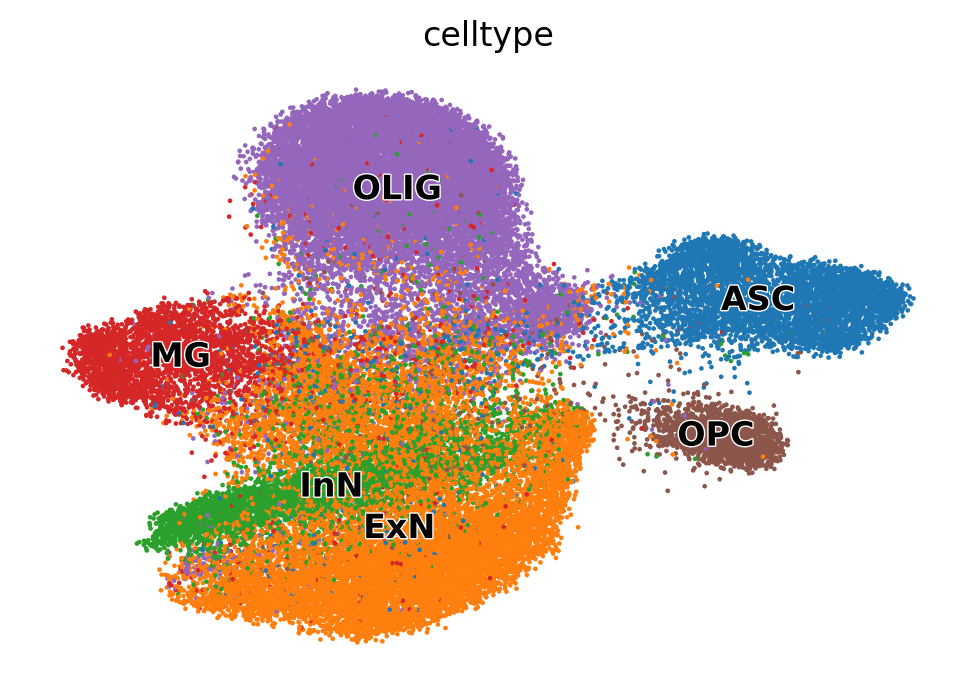

In [84]:
scv.tl.umap(adata_rna)
scv.pl.umap(adata_rna, color='celltype',save = "/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_adata_rna_umap_dPSI_genes.pdf")

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_adata_rna_umap_dPSI_genes_v2.pdf


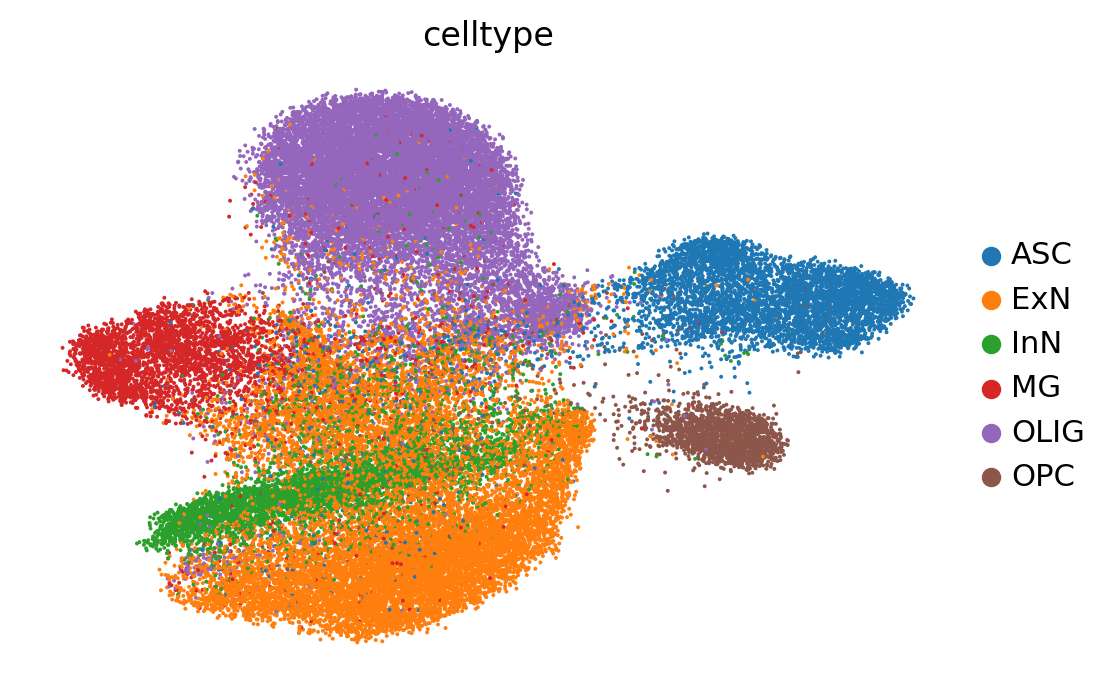

In [85]:
scv.pl.umap(adata_rna, color='celltype',size = 8, legend_loc='right margin',save = "/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_adata_rna_umap_dPSI_genes_v2.pdf")

In [86]:
adata_rna.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_adata_rna.dPSIgenes.celltype.filtered_normalized.h5ad')

In [95]:
# Read in Seurat WNN neighbors.
nn_idx = np.loadtxt("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/merge_wnn_files/control_10samples/control_nn_idx.txt", delimiter=',')
nn_dist = np.loadtxt("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/merge_wnn_files/control_10samples/control_nn_dist.txt", delimiter=',')
nn_cells = pd.Index(pd.read_csv("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/merge_wnn_files/control_10samples/control_nn_cells.txt", header=None)[0])


In [96]:
nn_cells

Index(['Gan59_AAACAGCCAAATTCGT-1', 'Gan59_AAACAGCCAATAGCCC-1',
       'Gan59_AAACAGCCACAATGCC-1', 'Gan59_AAACAGCCACAGACTC-1',
       'Gan59_AAACATGCAAACCTAT-1', 'Gan59_AAACATGCAAGCTAAA-1',
       'Gan59_AAACATGCAATAATCC-1', 'Gan59_AAACCAACAAGGACCA-1',
       'Gan59_AAACCAACACAAGCCT-1', 'Gan59_AAACCAACAGTATGTT-1',
       ...
       'Gan147_TTTGTGAAGCCGCAGT-1', 'Gan147_TTTGTGAAGGTCAAAG-1',
       'Gan147_TTTGTGAAGGTTAGCT-1', 'Gan147_TTTGTGAAGTTTGAGC-1',
       'Gan147_TTTGTGGCAACCCTCC-1', 'Gan147_TTTGTGGCAAGCCAGA-1',
       'Gan147_TTTGTGGCAGGCTGTT-1', 'Gan147_TTTGTGGCATCGTTCT-1',
       'Gan147_TTTGTTGGTAATGACT-1', 'Gan147_TTTGTTGGTAGTTACG-1'],
      dtype='object', name=0, length=48262)

In [97]:
np.all(nn_cells == adata_atac_all.obs_names)

True

In [98]:
adata_atac_all.obs_names

Index(['Gan59_AAACAGCCAAATTCGT-1', 'Gan59_AAACAGCCAATAGCCC-1',
       'Gan59_AAACAGCCACAATGCC-1', 'Gan59_AAACAGCCACAGACTC-1',
       'Gan59_AAACATGCAAACCTAT-1', 'Gan59_AAACATGCAAGCTAAA-1',
       'Gan59_AAACATGCAATAATCC-1', 'Gan59_AAACCAACAAGGACCA-1',
       'Gan59_AAACCAACACAAGCCT-1', 'Gan59_AAACCAACAGTATGTT-1',
       ...
       'Gan147_TTTGTGAAGCCGCAGT-1', 'Gan147_TTTGTGAAGGTCAAAG-1',
       'Gan147_TTTGTGAAGGTTAGCT-1', 'Gan147_TTTGTGAAGTTTGAGC-1',
       'Gan147_TTTGTGGCAACCCTCC-1', 'Gan147_TTTGTGGCAAGCCAGA-1',
       'Gan147_TTTGTGGCAGGCTGTT-1', 'Gan147_TTTGTGGCATCGTTCT-1',
       'Gan147_TTTGTTGGTAATGACT-1', 'Gan147_TTTGTTGGTAGTTACG-1'],
      dtype='object', length=48262)

In [99]:
adata_atac_all

AnnData object with n_obs × n_vars = 48262 × 13999
    obs: 'batch'

In [100]:
mv.knn_smooth_chrom(adata_atac_all, nn_idx, nn_dist)

In [101]:
shared_cells_new = pd.Index(np.intersect1d(adata_rna.obs_names, adata_atac_all.obs_names))

In [102]:
shared_cells_new

Index(['Gan142_AAACAGCCAAGCGAGC-1', 'Gan142_AAACAGCCAATTGAAG-1',
       'Gan142_AAACAGCCATTATCCC-1', 'Gan142_AAACATGCACACCAAC-1',
       'Gan142_AAACCAACACCTGCCT-1', 'Gan142_AAACCAACACGTTACA-1',
       'Gan142_AAACCAACACTATGGC-1', 'Gan142_AAACCGAAGGACACTT-1',
       'Gan142_AAACCGAAGGCGAAAC-1', 'Gan142_AAACCGCGTCCGGTTC-1',
       ...
       'Gan66_TTTGTGGCATGTTTGG-1', 'Gan66_TTTGTGTTCAGTTCCC-1',
       'Gan66_TTTGTGTTCCCGCCTA-1', 'Gan66_TTTGTGTTCCGCAACA-1',
       'Gan66_TTTGTTGGTCAAACTG-1', 'Gan66_TTTGTTGGTCAGGCCA-1',
       'Gan66_TTTGTTGGTCTTGCAT-1', 'Gan66_TTTGTTGGTTACGCGG-1',
       'Gan66_TTTGTTGGTTGAAGCC-1', 'Gan66_TTTGTTGGTTGCATCT-1'],
      dtype='object', length=47549)

In [103]:
adata_atac = adata_atac_all[shared_cells_new, shared_genes]

In [104]:
adata_atac

View of AnnData object with n_obs × n_vars = 47549 × 1621
    obs: 'batch'
    layers: 'Mc'
    obsp: 'connectivities'

In [105]:
adata_atac.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_adata_atac.dPSIgenes.celltype.filtered_knn.smooth.h5ad')

In [109]:
### reload  assay
adata_atac = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_adata_atac.dPSIgenes.celltype.filtered_knn.smooth.h5ad")

In [110]:
### reload rna assay
adata_rna = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_adata_rna.dPSIgenes.celltype.filtered_normalized.h5ad")

In [111]:
adata_rna

AnnData object with n_obs × n_vars = 47549 × 1621
    obs: 'celltype', 'batch', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'celltype_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [112]:
adata_atac

AnnData object with n_obs × n_vars = 47549 × 1621
    obs: 'batch'
    layers: 'Mc'
    obsp: 'connectivities'

In [113]:
# This will take a while. Parallelization is high recommended.
#mv.settings.VERBOSITY = 0
adata_result = mv.recover_dynamics_chrom(adata_rna,
                                         adata_atac,
                                         max_iter=5,
                                         init_mode="invert",
                                         parallel=True,
                                         save_plot=False,
                                         rna_only=False,
                                         fit=True,
                                         n_anchors=500,
                                         extra_color_key='celltype'
                                        )

/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/1621 [00:00<?, ?it/s]

Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed s

In [114]:
adata_result

AnnData object with n_obs × n_vars = 47549 × 1619
    obs: 'celltype', 'batch', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes'
    uns: 'celltype_colors', 'log1p', 'neighbors', 'pca', 'umap', 'velo_s_params', 'velo_u_params', 'velo_chrom_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'fit_anchor_c', 'fit_anchor_u', 'fit_anchor_s', 'fit_anchor_c_sw', 'fit_anchor_u_sw', 'fit_anchor_s_sw', 'fit_anchor_c_velo', 'fit_anchor_u_velo', 'fit_anchor_s_velo'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspl

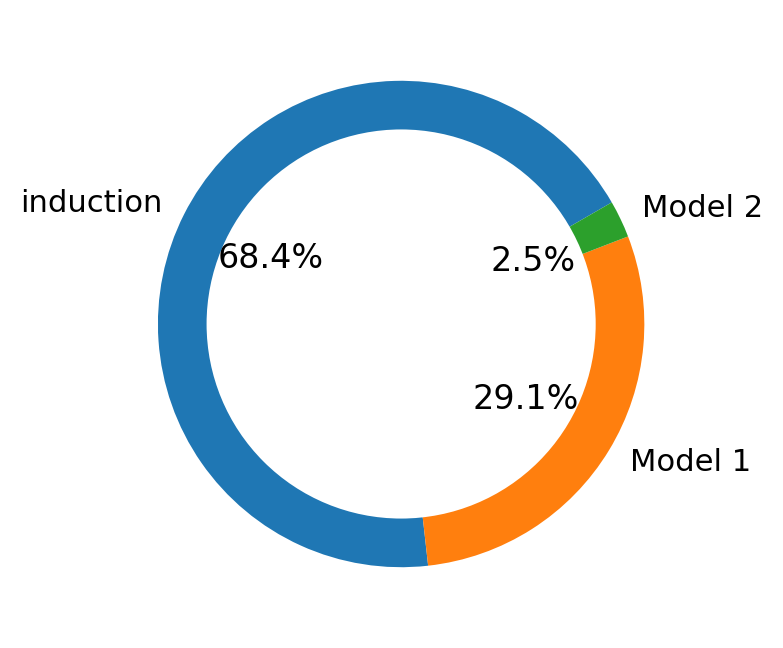

In [115]:
mv.pie_summary(adata_result)

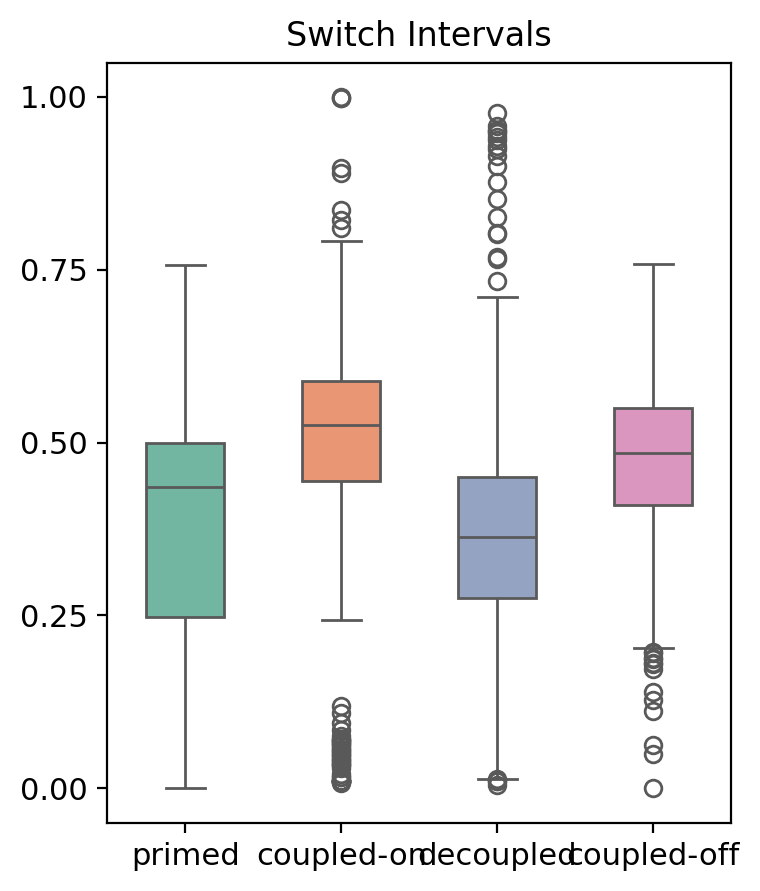

In [116]:
mv.switch_time_summary(adata_result)

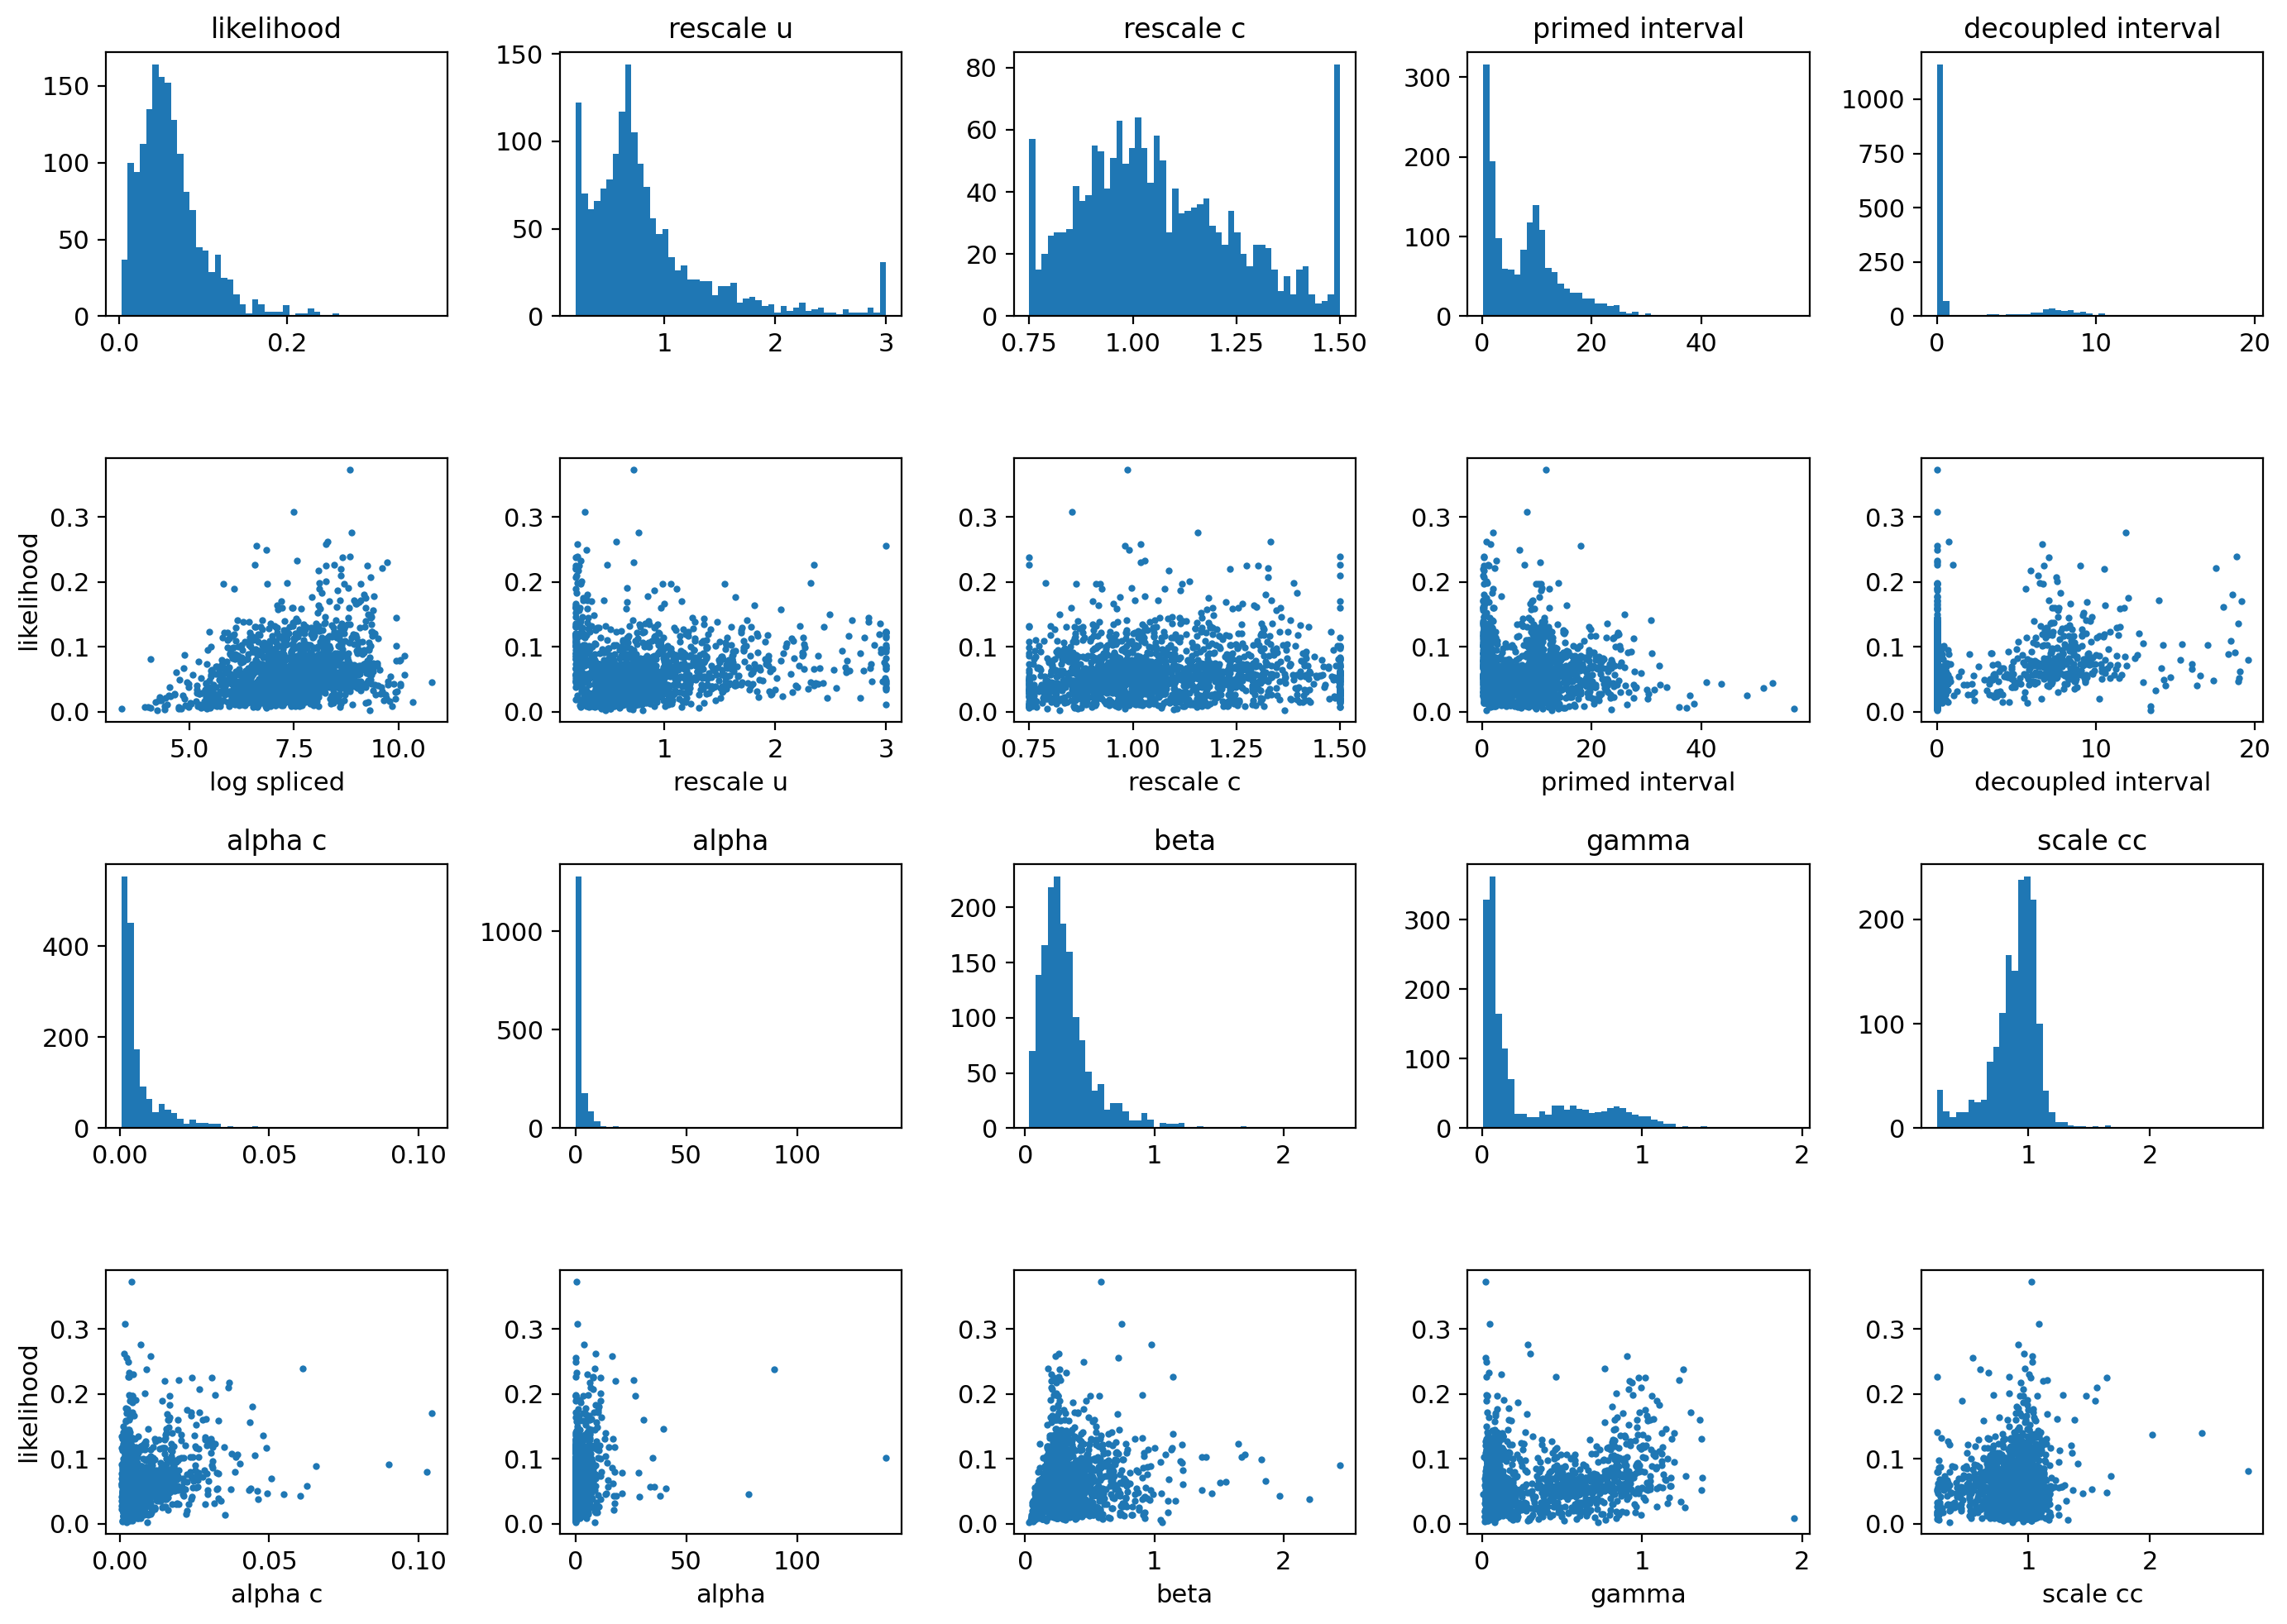

In [117]:
mv.likelihood_plot(adata_result)

In [118]:
#Computing velocity stream and latent time
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 1/56 cores)


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/47549 [00:00<?, ?cells/s]

    finished (0:00:58) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing terminal states
    identified 9 regions of root cells and 5 regions of end points .
    finished (0:00:05) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:11) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:13) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)
saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_multivelo_velocity_stream_dPSItested_genes.pdf


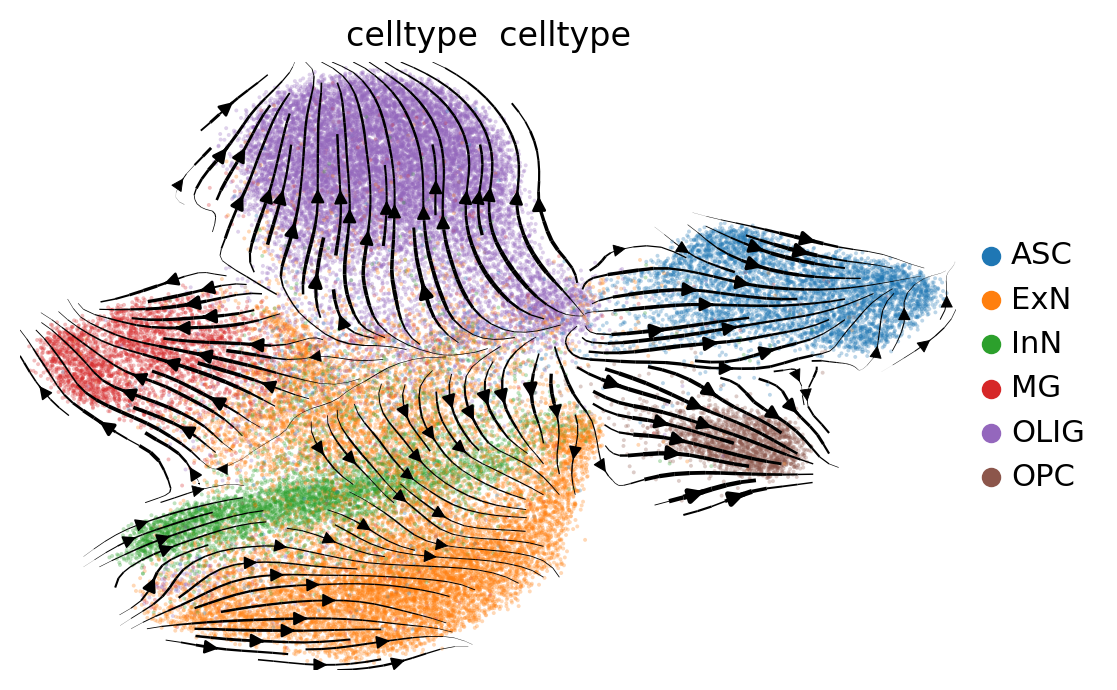

In [119]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='celltype',size = 8, legend_loc='right margin',layer='celltype', save = '/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_multivelo_velocity_stream_dPSItested_genes.pdf')

In [120]:
### add sampleID 
adata_result.obs['sampleID'] = [x.split('_')[0][:] for x in adata_result.obs_names]
adata_result.obs['group'] = adata_result.obs['sampleID']

In [129]:
control_list=['Gan59','Gan60','Gan61','Gan62','Gan63','Gan64','Gan66','Gan142','Gan142v2','Gan144','Gan144v2','Gan147']
for x in control_list:
    adata_result.obs['group']=adata_result.obs['group'].replace(x,"Control")

In [149]:
adata_result.obs['sample'] = [x.split('_')[0][:] for x in adata_result.obs_names]

sample_dup1=['Gan142v2']
for x in sample_dup1:
    adata_result.obs['sample']=adata_result.obs['sample'].replace(x,"Gan142")
    

sample_dup2=['Gan144v2']
for x in sample_dup2:
    adata_result.obs['sample']=adata_result.obs['sample'].replace(x,"Gan144")
    
    

In [150]:
adata_result.obs

celltype batch   n_counts  \
Gan142_AAACAGCCAAGCGAGC-1      ExN     0  97.999992   
Gan142_AAACAGCCAATTGAAG-1      InN     0  98.000000   
Gan142_AAACAGCCATTATCCC-1     OLIG     0  98.000000   
Gan142_AAACATGCACACCAAC-1     OLIG     0  97.999992   
Gan142_AAACCAACACCTGCCT-1     OLIG     0  98.000008   
...                            ...   ...        ...   
Gan66_TTTGTTGGTCAGGCCA-1      OLIG     0  97.999992   
Gan66_TTTGTTGGTCTTGCAT-1        MG     0  97.999992   
Gan66_TTTGTTGGTTACGCGG-1       ExN     0  97.999985   
Gan66_TTTGTTGGTTGAAGCC-1       ExN     0  98.000000   
Gan66_TTTGTTGGTTGCATCT-1       ExN     0  97.999992   

                           velo_s_norm_self_transition  root_cells  \
Gan142_AAACAGCCAAGCGAGC-1                     0.127250    0.169089   
Gan142_AAACAGCCAATTGAAG-1                     0.175273    0.004378   
Gan142_AAACAGCCATTATCCC-1                     0.071981    1.000000   
Gan142_AAACATGCACACCAAC-1                     0.104942    0.003621   
Gan142_AAACCAACACCTGCCT-1                     0.156688    0.011455   
...                                                ...         ...   
Gan66_TTTGTTGGTCAGGCCA-1                      0.102066    0.554845   
Gan66_TTTGTTGGTCTTGCAT-1                      0.106612    0.130613   
Gan66_TTTGTTGGTTACGCGG-1                      0.146981    0.203812   
Gan66_TTTGTTGGTTGAAGCC-1                      0.179249    0.004140   
Gan66_TTTGTTGGTTGCATCT-1                      0.112807    0.123616   

                           end_points  velo_s_norm_pseudotime  latent_time  \
Gan142_AAACAGCCAAGCGAGC-1    0.004665                0.128524     0.487612   
Gan142_AAACAGCCAATTGAAG-1    0.052807                0.197723     0.719833   
Gan142_AAACAGCCATTATCCC-1    0.000701                0.199610     0.347275   
Gan142_AAACATGCACACCAAC-1    0.327751                0.026780     0.051849   
Gan142_AAACCAACACCTGCCT-1    0.205200                0.021227     0.071649   
...                               ...                     ...          ...   
Gan66_TTTGTTGGTCAGGCCA-1     0.015635                0.004068     0.078311   
Gan66_TTTGTTGGTCTTGCAT-1     0.006843                0.217248     0.309240   
Gan66_TTTGTTGGTTACGCGG-1     0.044755                0.189403     0.692894   
Gan66_TTTGTTGGTTGAAGCC-1     0.231242                0.182152     0.912645   
Gan66_TTTGTTGGTTGCATCT-1     0.000378                0.181848     0.762508   

                          sampleID    group  velo_chrom_norm_self_transition  \
Gan142_AAACAGCCAAGCGAGC-1   Gan142  Control                         0.110977   
Gan142_AAACAGCCAATTGAAG-1   Gan142  Control                         0.066162   
Gan142_AAACAGCCATTATCCC-1   Gan142  Control                         0.038450   
Gan142_AAACATGCACACCAAC-1   Gan142  Control                         0.040448   
Gan142_AAACCAACACCTGCCT-1   Gan142  Control                         0.068734   
...                            ...      ...                              ...   
Gan66_TTTGTTGGTCAGGCCA-1     Gan66  Control                         0.090551   
Gan66_TTTGTTGGTCTTGCAT-1     Gan66  Control                         0.026960   
Gan66_TTTGTTGGTTACGCGG-1     Gan66  Control                         0.076790   
Gan66_TTTGTTGGTTGAAGCC-1     Gan66  Control                         0.102316   
Gan66_TTTGTTGGTTGCATCT-1     Gan66  Control                         0.040364   

                           sample  
Gan142_AAACAGCCAAGCGAGC-1  Gan142  
Gan142_AAACAGCCAATTGAAG-1  Gan142  
Gan142_AAACAGCCATTATCCC-1  Gan142  
Gan142_AAACATGCACACCAAC-1  Gan142  
Gan142_AAACCAACACCTGCCT-1  Gan142  
...                           ...  
Gan66_TTTGTTGGTCAGGCCA-1    Gan66  
Gan66_TTTGTTGGTCTTGCAT-1    Gan66  
Gan66_TTTGTTGGTTACGCGG-1    Gan66  
Gan66_TTTGTTGGTTGAAGCC-1    Gan66  
Gan66_TTTGTTGGTTGCATCT-1    Gan66  

[47549 rows x 12 columns]

In [151]:
set(adata_result.obs['sample'])

{'Gan142',
 'Gan144',
 'Gan147',
 'Gan59',
 'Gan60',
 'Gan61',
 'Gan62',
 'Gan63',
 'Gan64',
 'Gan66'}

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 1/56 cores)


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/47549 [00:00<?, ?cells/s]

    finished (0:00:52) --> added 
    'velo_chrom_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:12) --> added
    'velo_chrom_norm_umap', embedded velocity vectors (adata.obsm)


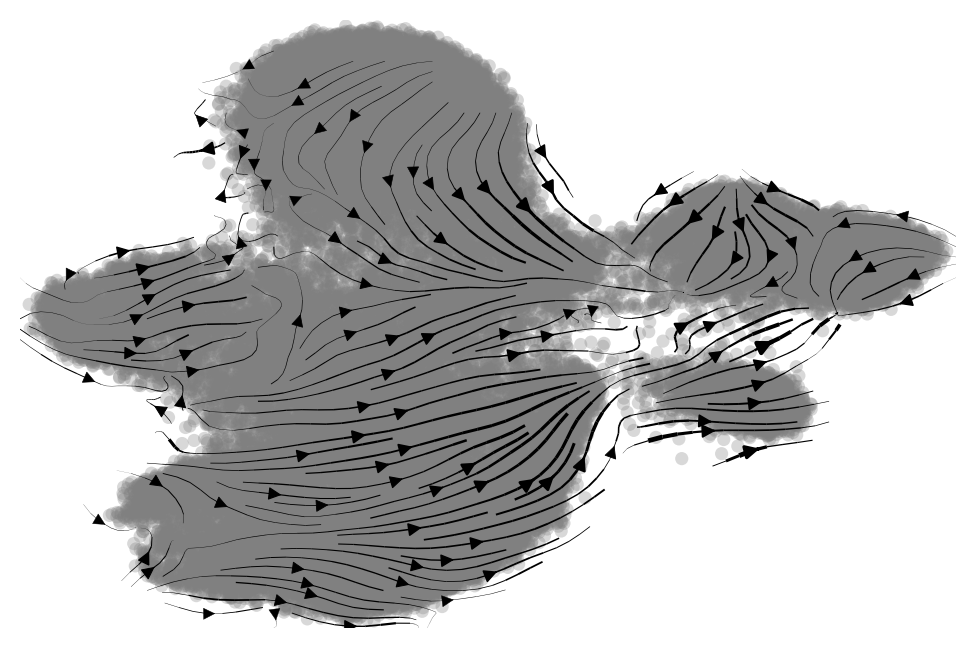

In [124]:
# velocity by atac
mv.velocity_embedding_stream(adata_result, basis='umap',vkey='velo_chrom')

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_multivelo_ATAC_velocity_stream_dPSItested_genes_byCelltype.pdf


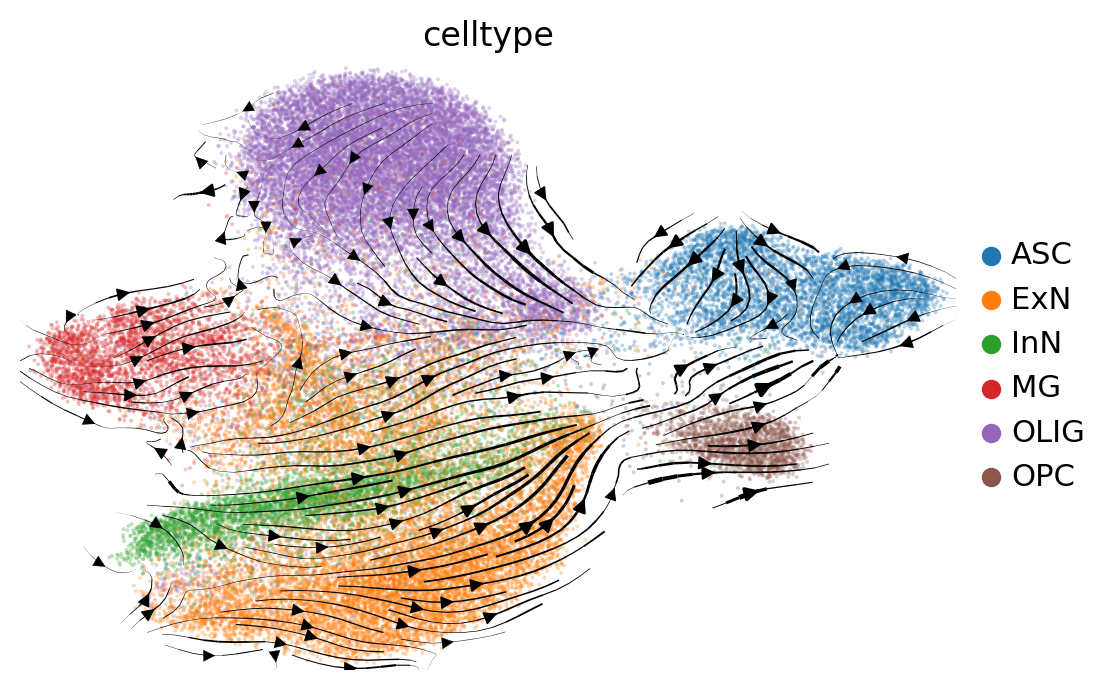

In [125]:
# plot velocity stream by velo_chrom
mv.velocity_embedding_stream(adata_result,color='celltype',size = 8, legend_loc='right margin', basis='umap',vkey='velo_chrom',save='/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_multivelo_ATAC_velocity_stream_dPSItested_genes_byCelltype.pdf')

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_latentTime.pdf


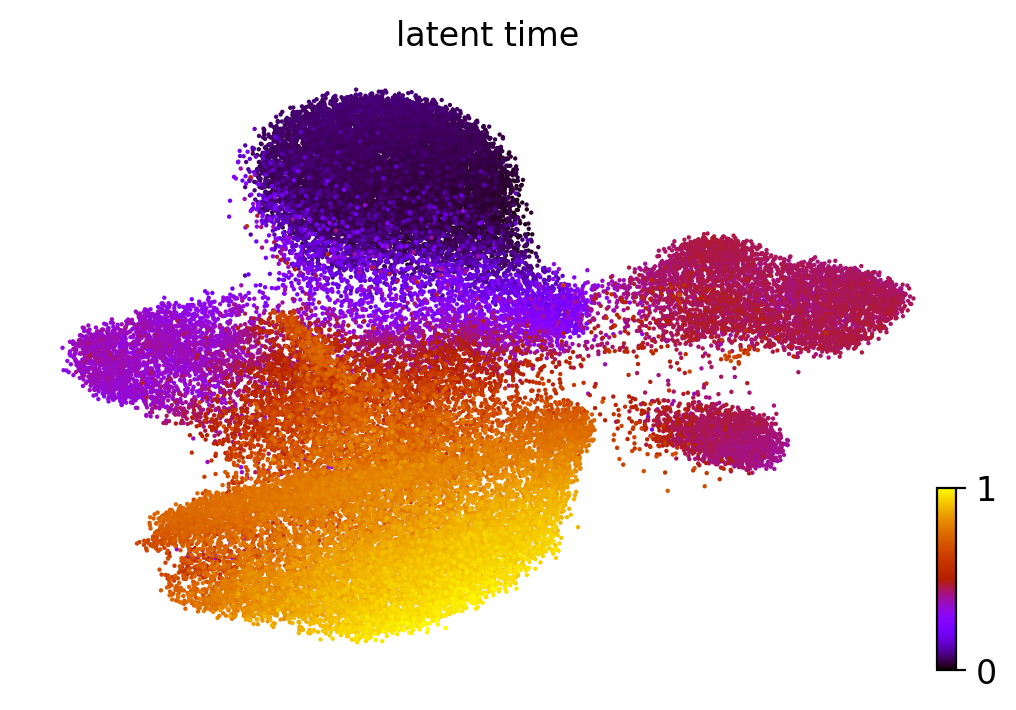

In [126]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=10,save='/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_latentTime.pdf')

In [155]:
adata_result

AnnData object with n_obs × n_vars = 47549 × 1619
    obs: 'celltype', 'batch', 'n_counts', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time', 'sampleID', 'group', 'velo_chrom_norm_self_transition', 'sample'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes', 'velo_s_norm_genes', 'velo_chrom_norm_genes'
    uns: 'celltype_colors', 'log1p', 'neighbors', 'pca', 'umap', 'velo_s_params', 'velo_u_params', 'velo_chrom_params', 'velo_s_norm_params', 'velo_s_norm_graph', 'velo_s_norm_graph_n

In [154]:
# Save the result for use later on
adata_result.write("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_multivelo_dPSItestedGenes.h5ad")

In [20]:
### reload  assay
adata_result = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_multivelo_dPSItestedGenes.h5ad")

In [21]:
unique_fit_model = set(adata_result.var['fit_model'])

In [134]:
unique_fit_model

{1.0, 2.0}

In [135]:
# get the model 1 genes
adata1 = adata_result[:, adata_result.var['fit_model'].values == 1]
# get the model 2 genes
adata2 = adata_result[:, adata_result.var['fit_model'].values == 2]

In [136]:
adata1.var

Accession Chromosome        End      Start Strand  fit_alpha_c  \
Gene                                                                           
AAK1    ENSG00000115977          2   69674349   69457997      -     0.009926   
ABAT    ENSG00000183044         16    8784575    8674596      +     0.030998   
ABCA5   ENSG00000154265         17   69327244   69244311      -     0.018127   
ABCB9   ENSG00000150967         12  122981649  122920951      -     0.009637   
ABCC1   ENSG00000103222         16   16143074   15949577      +     0.001234   
...                 ...        ...        ...        ...    ...          ...   
ZNF706  ENSG00000120963          8  101206193  101177878      -     0.004286   
ZNF711  ENSG00000147180          X   85273362   85244032      +     0.001833   
ZRANB3  ENSG00000121988          2  135531218  135136916      -     0.002937   
ZSWIM7  ENSG00000214941         17   15999717   15976560      -     0.003573   
ZYX     ENSG00000159840          7  143391111  143381295      +     0.005280   

        fit_alpha  fit_beta  fit_gamma  fit_t_sw1  fit_t_sw2   fit_t_sw3  \
Gene                                                                       
AAK1     7.951444  0.333927   0.804127  -0.004513   2.222244    9.305569   
ABAT     2.588145  0.188143   0.497415  -0.000684   1.095945    8.767422   
ABCA5    6.962087  0.167316   0.716010  -0.016454   2.031923    8.666569   
ABCB9    0.053927  0.647656   0.045113   9.453042  20.006694   21.324786   
ABCC1    0.301712  0.182482   0.045231   2.465764  20.025835   22.450331   
...           ...       ...        ...        ...        ...         ...   
ZNF706   0.041737  0.134779   0.024984  -0.072476  20.016041   23.831776   
ZNF711   0.732667  0.276353   0.072187  -0.036192  20.012824   21.261682   
ZRANB3   0.152443  0.051629   0.294553  -0.004849  20.010622  109.411765   
ZSWIM7   0.150003  0.670528   0.062344   8.135436  20.033364   21.945946   
ZYX      0.247137  0.222868   0.046537  -0.022284  20.018330   21.187215   

        fit_scale_cc  fit_rescale_c  fit_rescale_u  fit_alignment_scaling  \
Gene                                                                        
AAK1        1.000000       1.200000       0.412220               1.309711   
ABAT        1.063896       0.954436       0.270319               1.052743   
ABCA5       0.975412       1.128374       0.200000               1.043933   
ABCB9       0.274904       0.862578       1.621416               1.066239   
ABCC1       1.042239       0.809464       1.016092               1.652318   
...              ...            ...            ...                    ...   
ZNF706      1.076008       0.805455       1.328688               2.331776   
ZNF711      0.742490       1.197543       0.648531               1.165888   
ZRANB3      1.058148       0.960980       0.551146               5.870588   
ZSWIM7      1.024549       0.949032       2.242216               1.348649   
ZYX         0.978256       1.187219       0.451232               1.139269   

        fit_model fit_direction  fit_loss  fit_likelihood  fit_likelihood_c  \
Gene                                                                          
AAK1          1.0      complete  0.007837        0.060703          0.269781   
ABAT          1.0      complete  0.003452        0.086726          0.257608   
ABCA5         1.0      complete  0.005856        0.118844          0.275988   
ABCB9         1.0            on  0.000048        0.087864          0.259749   
ABCC1         1.0            on  0.029747        0.041574          0.289390   
...           ...           ...       ...             ...               ...   
ZNF706        1.0            on  0.000206        0.033787          0.261231   
ZNF711        1.0            on  0.029629        0.028072          0.268430   
ZRANB3        1.0            on  0.000249        0.008023          0.284760   
ZSWIM7        1.0            on  0.002032        0.086705          0.268297   
ZYX           1.0            on  0

In [137]:
adata2.var

Accession Chromosome        End      Start Strand  \
Gene                                                                
ABI1      ENSG00000136754         10   26861087   26746593      -   
ABR       ENSG00000159842         17    1229738    1003518      -   
ACTR2     ENSG00000138071          2   65271253   65227753      +   
ADD3      ENSG00000148700         10  110135565  109996368      +   
AMD1      ENSG00000123505          6  110898879  110874770      +   
ARHGAP12  ENSG00000165322         10   31928876   31805398      -   
ARHGAP26  ENSG00000145819          5  143229011  142770377      +   
ASRGL1    ENSG00000162174         11   62393412   62337448      +   
BSG       ENSG00000172270         19     583493     571277      +   
CALM3     ENSG00000160014         19   46610782   46601074      +   
CAMK2G    ENSG00000148660         10   73874591   73812501      -   
CAPZB     ENSG00000077549          1   19485539   19338775      -   
CEP97     ENSG00000182504          3  101770562  101724593      +   
CLTC      ENSG00000141367         17   59696956   59619689      +   
DNAJC6    ENSG00000116675          1   65415871   65248219      +   
DOCK4     ENSG00000128512          7  112206411  111726110      -   
DYNC1LI2  ENSG00000135720         16   66751609   66720893      -   
ELAVL2    ENSG00000107105          9   23826337   23690104      -   
EPB41L2   ENSG00000079819          6  131063322  130839347      -   
EPB41L3   ENSG00000082397         18    5630700    5392381      -   
FYN       ENSG00000010810          6  111873452  111660332      -   
GNAI3     ENSG00000065135          1  109618324  109548615      +   
GRAMD1A   ENSG00000089351         19   35026471   34994784      +   
HNRNPK    ENSG00000165119          9   83980616   83968083      -   
HSPH1     ENSG00000120694         13   31162388   31134973      -   
LPIN1     ENSG00000134324          2   11827409   11677595      +   
MBNL1     ENSG00000152601          3  152465780  152243828      +   
MCF2L     ENSG00000126217         13  113099742  112894378      +   
MEF2C     ENSG00000081189          5   88904257   88717117      -   
NCOA7     ENSG00000111912          6  125932034  125781161      +   
OLFM1     ENSG00000130558          9  135121179  135075422      +   
PAPOLG    ENSG00000115421          2   60802086   60756253      +   
PITPNC1   ENSG00000154217         17   67697261   67377281      +   
PLTP      ENSG00000100979         20   45912155   45898621      -   
SIK3      ENSG00000160584         11  117098437  116843402      -   
SIPA1L1   ENSG00000197555         14   71741229   71320449      +   
SLC8A1    ENSG00000183023          2   40611053   40097270      -   
SUGT1     ENSG00000165416         13   52700909   52652709      +   
TACC1     ENSG00000147526          8   38853028   38728186      +   
WDFY3     ENSG00000163625          4   84966391   84669610      -   

          fit_alpha_c  fit_alpha  fit_beta  fit_gamma  fit_t_sw1  fit_t_sw2  \
Gene                                                                          
ABI1         0.008243   4.525860  0.904763   1.375665  -0.097561  20.027361   
ABR          0.006806   2.705261  0.830929   0.964638   7.654540  11.745269   
ACTR2        0.003670   7.649353  0.781087   0.720724  -0.027563  18.032871   
ADD3         0.004759   7.203897  0.706850   0.786044  -0.027043  20.024207   
AMD1         0.007370   5.483749  0.972512   0.962721  -0.023323  16.970616   
ARHGAP12     0.004949   5.571083  0.219192   0.872019  -0.017103  20.032549   
ARHGAP26     0.005354   6.577879  0.881149   1.269325   3.428210  20.019039   
ASRGL1       0.004933   3.281460  0.962300   1.021268  -0.008526  14.331607   
BSG          0.006514   4.817357  0.783613   0.651099  -0.039079  13.908652   
CALM3        0.009278   8.923698  1.060933   0.726817   0.009532   6.599842   
CAMK2G       0.003978   8.838489  0.752172   1.090054  -0.001002  14.632215   
CAPZB        0.006055   2.987257  0.925404   0.902579  -0.180158  21.487037   
CEP97      

In [138]:
adata1.obs.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_module1_genes_major.celltypes_dPSItestedGenes_cells.txt', header=True, index=True)
adata1.var.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_module1_genes_major.celltypes_dPSItestedGenes_variable_genes.txt', header=True, index=True)

In [139]:
adata2.obs.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_module2_genes_major.celltypes_dPSItestedGenes_cells.txt', header=True, index=True)
adata2.var.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_module2_genes_major.celltypes_dPSItestedGenes_variable_genes.txt', header=True, index=True)

In [22]:
all_cells = adata_result.obs.index

In [23]:
dPSI_filter_genes = adata_result.var.index

In [142]:
all_cells

Index(['Gan142_AAACAGCCAAGCGAGC-1', 'Gan142_AAACAGCCAATTGAAG-1',
       'Gan142_AAACAGCCATTATCCC-1', 'Gan142_AAACATGCACACCAAC-1',
       'Gan142_AAACCAACACCTGCCT-1', 'Gan142_AAACCAACACGTTACA-1',
       'Gan142_AAACCAACACTATGGC-1', 'Gan142_AAACCGAAGGACACTT-1',
       'Gan142_AAACCGAAGGCGAAAC-1', 'Gan142_AAACCGCGTCCGGTTC-1',
       ...
       'Gan66_TTTGTGGCATGTTTGG-1', 'Gan66_TTTGTGTTCAGTTCCC-1',
       'Gan66_TTTGTGTTCCCGCCTA-1', 'Gan66_TTTGTGTTCCGCAACA-1',
       'Gan66_TTTGTTGGTCAAACTG-1', 'Gan66_TTTGTTGGTCAGGCCA-1',
       'Gan66_TTTGTTGGTCTTGCAT-1', 'Gan66_TTTGTTGGTTACGCGG-1',
       'Gan66_TTTGTTGGTTGAAGCC-1', 'Gan66_TTTGTTGGTTGCATCT-1'],
      dtype='object', length=47549)

In [24]:
dPSI_filter_genes

Index(['AAK1', 'ABAT', 'ABCA5', 'ABCB9', 'ABCC1', 'ABHD12', 'ABHD6', 'ABI1',
       'ABI2', 'ABL2',
       ...
       'ZNF567', 'ZNF568', 'ZNF573', 'ZNF615', 'ZNF638', 'ZNF706', 'ZNF711',
       'ZRANB3', 'ZSWIM7', 'ZYX'],
      dtype='object', name='Gene', length=1619)

In [26]:
all_cells = adata_result.obs.index
dPSI_filter_genes = adata_result.var.index
state_all = adata_result[:,dPSI_filter_genes].layers['fit_state']
state_all_df = pd.DataFrame(state_all)

In [27]:
state_all_df.index = all_cells
state_all_df.columns = dPSI_filter_genes

In [28]:
state_all_df

Gene                       AAK1  ABAT  ABCA5  ABCB9  ABCC1  ABHD12  ABHD6  \
Gan142_AAACAGCCAAGCGAGC-1   2.0   2.0    2.0    1.0    1.0     1.0    1.0   
Gan142_AAACAGCCAATTGAAG-1   2.0   3.0    2.0    1.0    1.0     1.0    1.0   
Gan142_AAACAGCCATTATCCC-1   2.0   2.0    3.0    1.0    1.0     1.0    1.0   
Gan142_AAACATGCACACCAAC-1   1.0   2.0    1.0    1.0    1.0     1.0    1.0   
Gan142_AAACCAACACCTGCCT-1   1.0   3.0    1.0    1.0    1.0     1.0    1.0   
...                         ...   ...    ...    ...    ...     ...    ...   
Gan66_TTTGTTGGTCAGGCCA-1    2.0   2.0    3.0    1.0    1.0     1.0    1.0   
Gan66_TTTGTTGGTCTTGCAT-1    2.0   2.0    2.0    1.0    1.0     2.0    1.0   
Gan66_TTTGTTGGTTACGCGG-1    2.0   2.0    2.0    1.0    1.0     3.0    1.0   
Gan66_TTTGTTGGTTGAAGCC-1    3.0   2.0    2.0    1.0    1.0     1.0    1.0   
Gan66_TTTGTTGGTTGCATCT-1    2.0   2.0    2.0    1.0    1.0     1.0    1.0   

Gene                       ABI1  ABI2  ABL2  ABLIM2  ABR  ABTB1  ACAA1  ACACB  \
Gan142_AAACAGCCAAGCGAGC-1   1.0   1.0   1.0     1.0  1.0    1.0    1.0    1.0   
Gan142_AAACAGCCAATTGAAG-1   1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
Gan142_AAACAGCCATTATCCC-1   1.0   1.0   1.0     1.0  2.0    1.0    1.0    3.0   
Gan142_AAACATGCACACCAAC-1   1.0   1.0   1.0     1.0  0.0    1.0    1.0    1.0   
Gan142_AAACCAACACCTGCCT-1   1.0   1.0   1.0     1.0  0.0    1.0    1.0    1.0   
...                         ...   ...   ...     ...  ...    ...    ...    ...   
Gan66_TTTGTTGGTCAGGCCA-1    1.0   1.0   1.0     1.0  1.0    1.0    1.0    1.0   
Gan66_TTTGTTGGTCTTGCAT-1    1.0   1.0   1.0     1.0  1.0    1.0    1.0    1.0   
Gan66_TTTGTTGGTTACGCGG-1    1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
Gan66_TTTGTTGGTTGAAGCC-1    1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
Gan66_TTTGTTGGTTGCATCT-1    1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   

Gene                       ACADSB  ACAP2  ACAP3  ACD  ACER3  ACO2  ACOT8  \
Gan142_AAACAGCCAAGCGAGC-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan142_AAACAGCCAATTGAAG-1     1.0    1.0    1.0  1.0    1.0   1.0    1.0   
Gan142_AAACAGCCATTATCCC-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan142_AAACATGCACACCAAC-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan142_AAACCAACACCTGCCT-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
...                           ...    ...    ...  ...    ...   ...    ...   
Gan66_TTTGTTGGTCAGGCCA-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan66_TTTGTTGGTCTTGCAT-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan66_TTTGTTGGTTACGCGG-1      1.0    1.0    1.0  1.0    3.0   1.0    1.0   
Gan66_TTTGTTGGTTGAAGCC-1      1.0    1.0    1.0  1.0    1.0   1.0    1.0   
Gan66_TTTGTTGGTTGCATCT-1      1.0    1.0    1.0  1.0    1.0   1.0    1.0   

Gene                       ACOT9  ACOX3  ACSL3  ACTN1  ACTN4  ACTR2  ACTR3B  \
Gan142_AAACAGCCAAGCGAGC-1    1.0    1.0    3.0    3.0    2.0    1.0     1.0   
Gan142_AAACAGCCAATTGAAG-1    1.0    1.0    3.0    3.0    2.0    1.0     1.0   
Gan142_AAACAGCCATTATCCC-1    1.0    1.0    3.0    3.0    2.0    1.0     1.0   
Gan142_AAACATGCACACCAAC-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan142_AAACCAACACCTGCCT-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
...                          ...    ...    ...    ...    ...    ...     ...   
Gan66_TTTGTTGGTCAGGCCA-1     1.0    1.0    2.0    3.0    2.0    1.0     1.0   
Gan66_TTTGTTGGTCTTGCAT-1     1.0    1.0    2.0    2.0    2.0    1.0     1.0   
Gan66_TTTGTTGGTTACGCGG-1     1.0    1.0    2.0    3.0    2.0    1.0     1.0   
Gan66_TTTGTTGGTTGAAGCC-1     1.0    1.0    3.0    3.0    2.0    1.0     1.0   
Gan66_TTTGTTGGTTGCATCT-1     1.0    1.0    3.0    3.0    2.0    1.0     1.0   

Gene                       ACVR2A  ADAM10  ADAM22  ADD1  ADD3  ADGRB3  ADGRL1  \
Gan142_AAACAGCCAAGCGAGC-1     1.0     2.0     2.0   3.0   1.0     1.0     1.0   
Gan142_AAACAGCCAATTGAAG-1     1.0     1.0     2.0   1.0   1.0     1.0     1.0 

In [147]:
state_all_df.min()

Gene
AAK1      1.0
ABAT      1.0
ABCA5     1.0
ABCB9     0.0
ABCC1     0.0
         ... 
ZNF706    1.0
ZNF711    1.0
ZRANB3    1.0
ZSWIM7    0.0
ZYX       1.0
Length: 1619, dtype: float64

In [148]:
# save the state matrix, index = cellID, header = geneName
state_all_df.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_multivelo_dPSItestedGenes_Cell_States_mtx.csv')

In [4]:
adata_result.obs

celltype batch   n_counts  \
Gan142_AAACAGCCAAGCGAGC-1      ExN     0  97.999992   
Gan142_AAACAGCCAATTGAAG-1      InN     0  98.000000   
Gan142_AAACAGCCATTATCCC-1     OLIG     0  98.000000   
Gan142_AAACATGCACACCAAC-1     OLIG     0  97.999992   
Gan142_AAACCAACACCTGCCT-1     OLIG     0  98.000008   
...                            ...   ...        ...   
Gan66_TTTGTTGGTCAGGCCA-1      OLIG     0  97.999992   
Gan66_TTTGTTGGTCTTGCAT-1        MG     0  97.999992   
Gan66_TTTGTTGGTTACGCGG-1       ExN     0  97.999985   
Gan66_TTTGTTGGTTGAAGCC-1       ExN     0  98.000000   
Gan66_TTTGTTGGTTGCATCT-1       ExN     0  97.999992   

                           velo_s_norm_self_transition  root_cells  \
Gan142_AAACAGCCAAGCGAGC-1                     0.127250    0.169089   
Gan142_AAACAGCCAATTGAAG-1                     0.175273    0.004378   
Gan142_AAACAGCCATTATCCC-1                     0.071981    1.000000   
Gan142_AAACATGCACACCAAC-1                     0.104942    0.003621   
Gan142_AAACCAACACCTGCCT-1                     0.156688    0.011455   
...                                                ...         ...   
Gan66_TTTGTTGGTCAGGCCA-1                      0.102066    0.554845   
Gan66_TTTGTTGGTCTTGCAT-1                      0.106612    0.130613   
Gan66_TTTGTTGGTTACGCGG-1                      0.146981    0.203812   
Gan66_TTTGTTGGTTGAAGCC-1                      0.179249    0.004140   
Gan66_TTTGTTGGTTGCATCT-1                      0.112807    0.123616   

                           end_points  velo_s_norm_pseudotime  latent_time  \
Gan142_AAACAGCCAAGCGAGC-1    0.004665                0.128524     0.487612   
Gan142_AAACAGCCAATTGAAG-1    0.052807                0.197723     0.719833   
Gan142_AAACAGCCATTATCCC-1    0.000701                0.199610     0.347275   
Gan142_AAACATGCACACCAAC-1    0.327751                0.026780     0.051849   
Gan142_AAACCAACACCTGCCT-1    0.205200                0.021227     0.071649   
...                               ...                     ...          ...   
Gan66_TTTGTTGGTCAGGCCA-1     0.015635                0.004068     0.078311   
Gan66_TTTGTTGGTCTTGCAT-1     0.006843                0.217248     0.309240   
Gan66_TTTGTTGGTTACGCGG-1     0.044755                0.189403     0.692894   
Gan66_TTTGTTGGTTGAAGCC-1     0.231242                0.182152     0.912645   
Gan66_TTTGTTGGTTGCATCT-1     0.000378                0.181848     0.762508   

                          sampleID    group  velo_chrom_norm_self_transition  \
Gan142_AAACAGCCAAGCGAGC-1   Gan142  Control                         0.110977   
Gan142_AAACAGCCAATTGAAG-1   Gan142  Control                         0.066162   
Gan142_AAACAGCCATTATCCC-1   Gan142  Control                         0.038450   
Gan142_AAACATGCACACCAAC-1   Gan142  Control                         0.040448   
Gan142_AAACCAACACCTGCCT-1   Gan142  Control                         0.068734   
...                            ...      ...                              ...   
Gan66_TTTGTTGGTCAGGCCA-1     Gan66  Control                         0.090551   
Gan66_TTTGTTGGTCTTGCAT-1     Gan66  Control                         0.026960   
Gan66_TTTGTTGGTTACGCGG-1     Gan66  Control                         0.076790   
Gan66_TTTGTTGGTTGAAGCC-1     Gan66  Control                         0.102316   
Gan66_TTTGTTGGTTGCATCT-1     Gan66  Control                         0.040364   

                           sample  
Gan142_AAACAGCCAAGCGAGC-1  Gan142  
Gan142_AAACAGCCAATTGAAG-1  Gan142  
Gan142_AAACAGCCATTATCCC-1  Gan142  
Gan142_AAACATGCACACCAAC-1  Gan142  
Gan142_AAACCAACACCTGCCT-1  Gan142  
...                           ...  
Gan66_TTTGTTGGTCAGGCCA-1    Gan66  
Gan66_TTTGTTGGTCTTGCAT-1    Gan66  
Gan66_TTTGTTGGTTACGCGG-1    Gan66  
Gan66_TTTGTTGGTTGAAGCC-1    Gan66  
Gan66_TTTGTTGGTTGCATCT-1    Gan66  

[47549 rows x 12 columns]

In [11]:
adata_result_exn = adata_result[adata_result.obs['celltype'] == "ExN"]

In [12]:
exn_cells = adata_result_exn.obs.index
dPSI_filter_genes = adata_result.var.index
state_exn = adata_result[exn_cells,dPSI_filter_genes].layers['fit_state']
state_exn_df = pd.DataFrame(state_exn)
state_exn_df.index = exn_cells
state_exn_df.columns = dPSI_filter_genes

In [13]:
state_exn_df

Gene                       AAK1  ABAT  ABCA5  ABCB9  ABCC1  ABHD12  ABHD6  \
Gan142_AAACAGCCAAGCGAGC-1   2.0   2.0    2.0    1.0    1.0     1.0    1.0   
Gan142_AAACCAACACGTTACA-1   2.0   2.0    3.0    1.0    1.0     1.0    1.0   
Gan142_AAAGCACCATCCGTAA-1   2.0   3.0    2.0    1.0    1.0     1.0    1.0   
Gan142_AAAGCCCGTGAAACAA-1   2.0   2.0    2.0    1.0    1.0     3.0    1.0   
Gan142_AAAGCCCGTTATCGAG-1   2.0   3.0    2.0    1.0    1.0     3.0    1.0   
...                         ...   ...    ...    ...    ...     ...    ...   
Gan66_TTTGTGTTCCCGCCTA-1    3.0   2.0    2.0    1.0    1.0     1.0    1.0   
Gan66_TTTGTTGGTCAAACTG-1    3.0   3.0    2.0    1.0    1.0     1.0    1.0   
Gan66_TTTGTTGGTTACGCGG-1    2.0   2.0    2.0    1.0    1.0     3.0    1.0   
Gan66_TTTGTTGGTTGAAGCC-1    3.0   2.0    2.0    1.0    1.0     1.0    1.0   
Gan66_TTTGTTGGTTGCATCT-1    2.0   2.0    2.0    1.0    1.0     1.0    1.0   

Gene                       ABI1  ABI2  ABL2  ABLIM2  ABR  ABTB1  ACAA1  ACACB  \
Gan142_AAACAGCCAAGCGAGC-1   1.0   1.0   1.0     1.0  1.0    1.0    1.0    1.0   
Gan142_AAACCAACACGTTACA-1   1.0   1.0   1.0     1.0  1.0    1.0    1.0    3.0   
Gan142_AAAGCACCATCCGTAA-1   1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
Gan142_AAAGCCCGTGAAACAA-1   1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
Gan142_AAAGCCCGTTATCGAG-1   1.0   1.0   1.0     1.0  1.0    1.0    1.0    1.0   
...                         ...   ...   ...     ...  ...    ...    ...    ...   
Gan66_TTTGTGTTCCCGCCTA-1    1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
Gan66_TTTGTTGGTCAAACTG-1    1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
Gan66_TTTGTTGGTTACGCGG-1    1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
Gan66_TTTGTTGGTTGAAGCC-1    1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
Gan66_TTTGTTGGTTGCATCT-1    1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   

Gene                       ACADSB  ACAP2  ACAP3  ACD  ACER3  ACO2  ACOT8  \
Gan142_AAACAGCCAAGCGAGC-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan142_AAACCAACACGTTACA-1     1.0    1.0    1.0  1.0    3.0   1.0    1.0   
Gan142_AAAGCACCATCCGTAA-1     1.0    1.0    1.0  1.0    1.0   1.0    1.0   
Gan142_AAAGCCCGTGAAACAA-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan142_AAAGCCCGTTATCGAG-1     1.0    1.0    1.0  1.0    1.0   1.0    1.0   
...                           ...    ...    ...  ...    ...   ...    ...   
Gan66_TTTGTGTTCCCGCCTA-1      1.0    1.0    1.0  1.0    1.0   1.0    1.0   
Gan66_TTTGTTGGTCAAACTG-1      1.0    1.0    1.0  1.0    1.0   1.0    1.0   
Gan66_TTTGTTGGTTACGCGG-1      1.0    1.0    1.0  1.0    3.0   1.0    1.0   
Gan66_TTTGTTGGTTGAAGCC-1      1.0    1.0    1.0  1.0    1.0   1.0    1.0   
Gan66_TTTGTTGGTTGCATCT-1      1.0    1.0    1.0  1.0    1.0   1.0    1.0   

Gene                       ACOT9  ACOX3  ACSL3  ACTN1  ACTN4  ACTR2  ACTR3B  \
Gan142_AAACAGCCAAGCGAGC-1    1.0    1.0    3.0    3.0    2.0    1.0     1.0   
Gan142_AAACCAACACGTTACA-1    1.0    1.0    3.0    2.0    2.0    1.0     1.0   
Gan142_AAAGCACCATCCGTAA-1    1.0    1.0    3.0    2.0    2.0    1.0     1.0   
Gan142_AAAGCCCGTGAAACAA-1    1.0    1.0    3.0    2.0    2.0    1.0     1.0   
Gan142_AAAGCCCGTTATCGAG-1    1.0    1.0    3.0    3.0    2.0    1.0     1.0   
...                          ...    ...    ...    ...    ...    ...     ...   
Gan66_TTTGTGTTCCCGCCTA-1     1.0    1.0    2.0    2.0    2.0    1.0     1.0   
Gan66_TTTGTTGGTCAAACTG-1     1.0    1.0    3.0    2.0    2.0    1.0     1.0   
Gan66_TTTGTTGGTTACGCGG-1     1.0    1.0    2.0    3.0    2.0    1.0     1.0   
Gan66_TTTGTTGGTTGAAGCC-1     1.0    1.0    3.0    3.0    2.0    1.0     1.0   
Gan66_TTTGTTGGTTGCATCT-1     1.0    1.0    3.0    3.0    2.0    1.0     1.0   

Gene                       ACVR2A  ADAM10  ADAM22  ADD1  ADD3  ADGRB3  ADGRL1  \
Gan142_AAACAGCCAAGCGAGC-1     1.0     2.0     2.0   3.0   1.0     1.0     1.0   
Gan142_AAACCAACACGTTACA-1     1.0     2.0     2.0   2.0   1.0     1.0     1.0 

In [9]:
# save the state matrix, index = cellID, header = geneName
state_exn_df.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_multivelo_dPSItestedGenes_ExN_Cell_States_mtx.csv')

In [15]:
adata_result_oligo = adata_result[adata_result.obs['celltype'] == "OLIG"]

In [16]:
oligo_cells = adata_result_oligo.obs.index
dPSI_filter_genes = adata_result.var.index
state_oligo = adata_result[oligo_cells,dPSI_filter_genes].layers['fit_state']
state_oligo_df = pd.DataFrame(state_oligo)
state_oligo_df.index = oligo_cells
state_oligo_df.columns = dPSI_filter_genes

In [17]:
state_oligo_df

Gene                       AAK1  ABAT  ABCA5  ABCB9  ABCC1  ABHD12  ABHD6  \
Gan142_AAACAGCCATTATCCC-1   2.0   2.0    3.0    1.0    1.0     1.0    1.0   
Gan142_AAACATGCACACCAAC-1   1.0   2.0    1.0    1.0    1.0     1.0    1.0   
Gan142_AAACCAACACCTGCCT-1   1.0   3.0    1.0    1.0    1.0     1.0    1.0   
Gan142_AAACCAACACTATGGC-1   2.0   2.0    2.0    1.0    1.0     1.0    1.0   
Gan142_AAACCGAAGGACACTT-1   2.0   3.0    2.0    1.0    1.0     1.0    1.0   
...                         ...   ...    ...    ...    ...     ...    ...   
Gan66_TTTGGTGCACCTACGG-1    1.0   2.0    3.0    1.0    1.0     1.0    1.0   
Gan66_TTTGTCTAGCGATAAG-1    1.0   1.0    3.0    1.0    1.0     1.0    1.0   
Gan66_TTTGTCTAGTTTCCGC-1    3.0   2.0    2.0    1.0    1.0     1.0    1.0   
Gan66_TTTGTGGCAACTAACT-1    1.0   1.0    3.0    1.0    1.0     1.0    1.0   
Gan66_TTTGTTGGTCAGGCCA-1    2.0   2.0    3.0    1.0    1.0     1.0    1.0   

Gene                       ABI1  ABI2  ABL2  ABLIM2  ABR  ABTB1  ACAA1  ACACB  \
Gan142_AAACAGCCATTATCCC-1   1.0   1.0   1.0     1.0  2.0    1.0    1.0    3.0   
Gan142_AAACATGCACACCAAC-1   1.0   1.0   1.0     1.0  0.0    1.0    1.0    1.0   
Gan142_AAACCAACACCTGCCT-1   1.0   1.0   1.0     1.0  0.0    1.0    1.0    1.0   
Gan142_AAACCAACACTATGGC-1   1.0   1.0   1.0     1.0  3.0    1.0    1.0    1.0   
Gan142_AAACCGAAGGACACTT-1   1.0   1.0   1.0     1.0  2.0    1.0    1.0    1.0   
...                         ...   ...   ...     ...  ...    ...    ...    ...   
Gan66_TTTGGTGCACCTACGG-1    1.0   1.0   1.0     1.0  0.0    1.0    1.0    1.0   
Gan66_TTTGTCTAGCGATAAG-1    1.0   1.0   1.0     1.0  0.0    1.0    1.0    1.0   
Gan66_TTTGTCTAGTTTCCGC-1    1.0   1.0   1.0     1.0  1.0    1.0    1.0    3.0   
Gan66_TTTGTGGCAACTAACT-1    1.0   1.0   1.0     1.0  3.0    1.0    1.0    1.0   
Gan66_TTTGTTGGTCAGGCCA-1    1.0   1.0   1.0     1.0  1.0    1.0    1.0    1.0   

Gene                       ACADSB  ACAP2  ACAP3  ACD  ACER3  ACO2  ACOT8  \
Gan142_AAACAGCCATTATCCC-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan142_AAACATGCACACCAAC-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan142_AAACCAACACCTGCCT-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan142_AAACCAACACTATGGC-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan142_AAACCGAAGGACACTT-1     1.0    1.0    1.0  1.0    3.0   1.0    1.0   
...                           ...    ...    ...  ...    ...   ...    ...   
Gan66_TTTGGTGCACCTACGG-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan66_TTTGTCTAGCGATAAG-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan66_TTTGTCTAGTTTCCGC-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan66_TTTGTGGCAACTAACT-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan66_TTTGTTGGTCAGGCCA-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   

Gene                       ACOT9  ACOX3  ACSL3  ACTN1  ACTN4  ACTR2  ACTR3B  \
Gan142_AAACAGCCATTATCCC-1    1.0    1.0    3.0    3.0    2.0    1.0     1.0   
Gan142_AAACATGCACACCAAC-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan142_AAACCAACACCTGCCT-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan142_AAACCAACACTATGGC-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan142_AAACCGAAGGACACTT-1    1.0    1.0    3.0    3.0    2.0    1.0     1.0   
...                          ...    ...    ...    ...    ...    ...     ...   
Gan66_TTTGGTGCACCTACGG-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan66_TTTGTCTAGCGATAAG-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan66_TTTGTCTAGTTTCCGC-1     1.0    1.0    2.0    2.0    2.0    1.0     1.0   
Gan66_TTTGTGGCAACTAACT-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan66_TTTGTTGGTCAGGCCA-1     1.0    1.0    2.0    3.0    2.0    1.0     1.0   

Gene                       ACVR2A  ADAM10  ADAM22  ADD1  ADD3  ADGRB3  ADGRL1  \
Gan142_AAACAGCCATTATCCC-1     1.0     2.0     2.0   2.0   1.0     1.0     1.0   
Gan142_AAACATGCACACCAAC-1     1.0     2.0     2.0   2.0   1.0     1.0     1.0 

In [18]:
# save the state matrix, index = cellID, header = geneName
state_oligo_df.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_10Controls_multivelo_dPSItestedGenes_OLIGO_Cell_States_mtx.csv')